In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Cargamos los datos

In [2]:
test = pd.read_csv('data/test/test.csv')
test.shape

(3972, 23)

In [3]:
train = pd.read_csv('data/train/train.csv')
train.shape

(14993, 24)

In [4]:
set(train.columns) ^ set(test.columns) # ^ es diferencia simetrica

{'AdoptionSpeed'}

##### Observamos que State es un numero, por ello cargaremos luego la tabla<br>de equivalencias para State para facilitar legibilidad


In [5]:
test.State.value_counts()

41326    1833
41401    1072
41327     510
41330     147
41336     127
41332     101
41324      73
41325      63
41335      17
41367       7
41345       7
41342       5
41415       4
41361       3
41380       3
Name: State, dtype: int64

In [6]:
train.State.value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

##### Cargamos tabla de equivalencias de estados y la agregamos a train y test

In [7]:
df_state = pd.read_csv('data/state_labels.csv')
df_state.rename(columns={"StateID":"State"}, inplace=True)
df_state

,State,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [8]:
train = pd.merge(train, df_state)
test = pd.merge(test, df_state)

### Quantity
Eventualmente nos encontramos con varias mascotas en un solo anuncio

In [9]:
df_quantcum = pd.DataFrame(train.Quantity.value_counts())
df_quantcum.rename(columns={'Quantity':'Freq'}, inplace=True)
df_quantcum['CumulativeFreq'] = df_quantcum.Freq.cumsum()
df_quantcum['RelFreq'] = df_quantcum.Freq / df_quantcum.Freq.sum()
df_quantcum['CumulativeRelFreq'] = df_quantcum.RelFreq.cumsum()
df_quantcum

,Freq,CumulativeFreq,RelFreq,CumulativeRelFreq
1,11565,11565,0.771360,0.771360
2,1422,12987,0.094844,0.866204
3,726,13713,0.048423,0.914627
4,531,14244,0.035417,0.950043
5,333,14577,0.022210,0.972254
6,185,14762,0.012339,0.984593
7,84,14846,0.005603,0.990195
8,52,14898,0.003468,0.993664
9,33,14931,0.002201,0.995865
10,19,14950,0.001267,0.997132


In [10]:
1 - 0.995865 #anuncios con 10 mascotas o mas

0.004135

Text(0.5, 1.0, 'Presencia de anuncios por cantidad de mascotas ofrecidas')

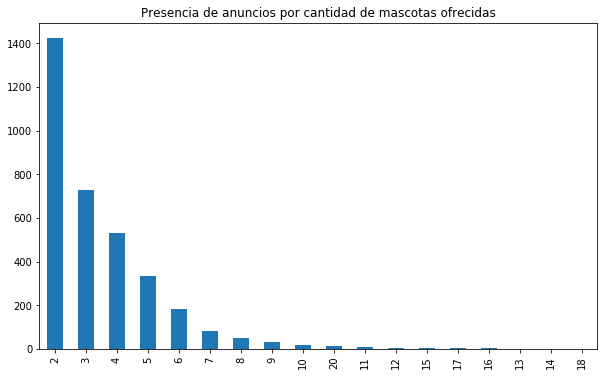

In [11]:
#ax = df_quantcum[df_quantcum.Freq > 100]['Freq'].plot.pie()

ax = df_quantcum['Freq'].iloc[1:].plot.bar(figsize=(10, 6))
ax.set_title("Presencia de anuncios por cantidad de mascotas ofrecidas")

In [100]:
#se observa que el grupo mayoritario es el de anuncios con 1 mascota
#luego separaremos en dos grupos menores: anuncios con 2 o 3 mascotas y
#                                         anuncios con 4 o mas mascotas

In [12]:
def assign_group_quantity(original_quantity):
    if original_quantity <= 0:
        raise ValueError("Expected quantity > 0")
    if original_quantity == 1:
        return "Single pet"
    elif original_quantity <= 3:
        return "2 - 3 pets"
    else:
        return "> 3 pets"

In [13]:
train['QuantityGroup'] = train.Quantity.apply(assign_group_quantity)
#test['QuantityGroup']  = test.Quantity.apply(assign_group_quantity)

Observamos que los anuncios de mascotas solas ocupan más del 77% del total. <br>Asimismo, notamos que los anuncios con 10 mascotas o más representan menos del 0.5% del total, podríamos darle una revisión rápida

In [14]:
#pd.set_option('display.max_info_rows',-1)
pd.set_option('display.max_colwidth',-1)


In [15]:
big_q_sample = train.loc[train.Quantity >= 10].sample(10)[['Name', 'Description', 'Quantity', 'AdoptionSpeed']]
big_q_sample

,Name,Description,Quantity,AdoptionSpeed
13276,Mercy Residents,"Hi These puppies and doggies are from our Mercy Shelter which is located at Taman Emas, Perai. We have so many of beautiful and loving fur kids that needs a lot of love and a forever home. Please visit our shelter to help our fur kids. Thank you.",15,4
14837,Mocha,Mocha is a lovable and friendly dog Owner is terminally ill and unable to care for her,20,4
8811,OMIEY'S HOME,"Hi, kepada sesiapa yang berminat untuk adopt kucing-kucing sila hubungi saya . Di sini ada berbagai jenis kucing, dari short hair - long hair.",20,4
356,Wanna Try Puppydum? Adopt 1!,"To reduce the number of strays in our society, I have learned from a kind-hearted lady who has a golden heart on how to rescue the puppies n rehome them and neuter the stray parents so that the population of strays will not grow. The lady and I went to rescue the puppies under the unwanted cars. They were wet when it is raining. They were suffered when it is sunny. They are so adorable although they are dirty n smelly under the unwanted cars. We have to 'dig & drag' them when they (10 of them) were under the cars. It's so grateful that they (7 of them) have been rescued. We have found the other 3 missing puppies yesterday night (13th April ). What a wonderful blessing! All (10) have been adopted on 18th May ! Thank you! Those who have adopted one or some even two, you are very kind hearted and you are a person with golden heart! Care and love for the one you have adopted and adopted the one you will love and care for. Thank you for telling the world that we as humans do treat pets as loyal friends & families but not food or punching bag for tortured and abused. You earn my respect. Take care and thank you Petfinder!",10,2
237,"Giant, Cookie & Snoopy. ! Thanks!","puppies for adoption. Rescued by some good samaritans. No information on breeds, probably mongrels. All about a month old. They have been dewormed but not yet vaccinated. Cookie- female- Smaller than the rest but fiesty! Snoopy- male- Attention seeker. LOVES wagging his tail! Giant- male- Gentle giant. Very soft fur coat! Very playful! Some videos: Giant and his tennis ball- Giant playing with Snoopy- Giant being bullied- ------------------------------------------------------------------------------------------------ Due to the overwhelming response from my last email (I got close to emails/ sms/ calls), I am sorry but I need to lay down some ground rules. Thank you VERY VERY MUCH in advance for reading this email and forwarding it to your friends and family. Apologies in advance if the terms and conditions set out below are a little ""harsh"", but I have gotten too many emails from very rude people, calls from people who do not even know that it is NOT OK to call people at 2am, etc. Also, our intentions are very simple: WE JUST WANT TO FIND GOOD HOMES FOR THE PUPPIES. 1) Please DO NOT ask me what breed these are, they are stray puppies. If you want a pedigree Siberian Husky, please visit your neighbourhood pet shop. 2) These are large breed dogs, they will grow into a standard size dog. They are not toy dogs, hence not suitable for those who live in an apartment/ condominium. 3) Please DO NOT delete my email with all these information and just forward the photos. I get too many people asking me for information which I have already given in the first place. 4) This email is dated 2 February . This is to manage your expectations on whether the puppy you fell in love with is still available. 5) We reside in Seri Kembangan, KL, near the Astro office (there is someone at home 95% of the time). Please only contact us if you are willing to come to our house to pick the puppies up. It will also mean that we get a chance to meet the new ""owners"" to see whether they are suitable for the puppies. We want to find good homes for the puppies and ensure that they do not get kicked out into the streets once they are grown and lose their cuteness. Those who are interested

Text(0.5, 1.0, 'Tiempo de adopción para anuncios con 10 o más mascotas')

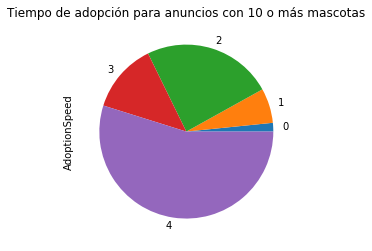

In [16]:
ax = train.loc[train.Quantity >= 10].AdoptionSpeed\
            .value_counts().sort_index()\
            .plot.pie()
ax.set_title('Tiempo de adopción para anuncios con 10 o más mascotas')

Existen casos en que se ofrecen demasiadas mascotas. Además se observa que a veces las cantidades
<br>en la descripción no encajan con las de la columna Quantity:

In [41]:
train.loc[[989,11673]][['Name', 'Description', 'Quantity', 'AdoptionSpeed']]

,Name,Description,Quantity,AdoptionSpeed
989,Cats From TTDI Now In Omiey's Home,"Hi feline lovers, There are 40 cats desperately seeking new homes before they are taken away from DBKL! This video link shows the lady who has been keeping these cats: Her neighbors seem to dislike cats, so they complained to DBKL. DBKL came to her house and told her to get rid of those cats. They'll be coming back to her house this Monday (6th February ) and she can only have 1 cat. DBKL will take the other cats and put them to sleep. She's looking for people who wants to adopt her cats and be their new owner. If you are interested, please contact Nicole at. Thank you.",20,2
11673,Snowy,Snowy is quiet and adorable. Likes to keep to herself most of the time because she is shy. She could be playful when she is in the mood to play with you.,10,4


En el primer caso, se ofrecen 40 gatos en la descripción, pero en la columna de cantidad figura la cantidad de 20.
<br>En el otro, se ofrece solo 1 en el texto, pero en la columna Quantity se indica 10.

Un punto importante es el hecho de que existe una cantidad importante de casos en<br>
que las mascotas logran ser adoptadas

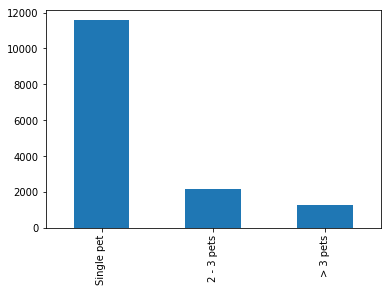

In [17]:
train['QuantityGroup'].value_counts().plot.bar()

In [18]:
qgruops = train[['QuantityGroup','AdoptionSpeed', 'PetID']].groupby(['QuantityGroup','AdoptionSpeed']).count() 
qgruops = qgruops.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
qgruops = qgruops.pivot_table(index= 'QuantityGroup',columns='AdoptionSpeed',values='PetID')
#qgruops.sort_index(ascending=False, inplace=True)
origindex = qgruops.index
qgruops = qgruops.reindex([origindex.tolist()[-1]] + origindex.tolist()[:2])
qgruops

AdoptionSpeed,0,1,2,3,4
QuantityGroup,,,,,
Single pet,331,2439,3163,2552,3080
2 - 3 pets,55,448,543,455,647
> 3 pets,24,203,331,252,470


In [19]:
q_percentages = (qgruops.T/qgruops.sum(axis=1)).T 
q_percentages

AdoptionSpeed,0,1,2,3,4
QuantityGroup,,,,,
Single pet,0.028621,0.210895,0.273498,0.220666,0.266321
2 - 3 pets,0.025605,0.208566,0.252793,0.211825,0.301210
> 3 pets,0.018750,0.158594,0.258594,0.196875,0.367188


<Figure size 432x288 with 0 Axes>

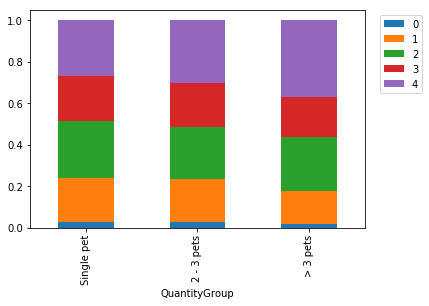

In [20]:
fig = plt.figure()
ax = q_percentages.plot.bar(stacked=True)
ax.legend(bbox_to_anchor = (1.03, 1.))

Se puede observar que los grupos de mascotas grandes tardan más en ser adoptados.
<br>Esto podría indicar que la velocidad de adopción guarda relación con el número de mascotas.


In [44]:
for i in range(15):
    if i % 5 == 0:
        print()
    print(q_percentages.values.flat[i], end=' ')
    


0.028620838737570254 0.21089494163424125 0.27349762213575446 0.22066580198875918 0.2663207955036749 
0.02461322081575246 0.2039381153305204 0.2545710267229255 0.2158931082981716 0.3009845288326301 
0.02193419740777667 0.17996011964107678 0.25523429710867396 0.19940179461615154 0.34346959122632104 

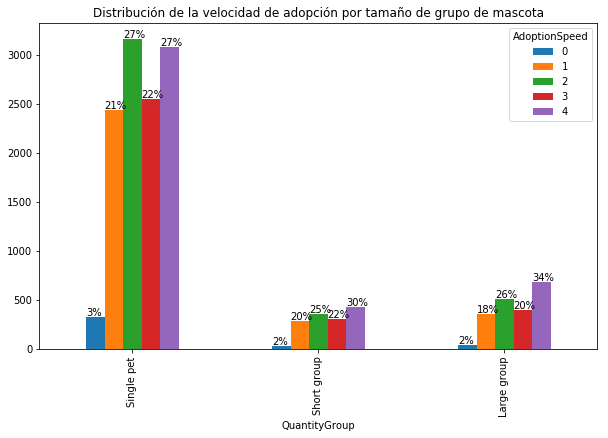

In [51]:
#deprecated
ax = qgruops.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por tamaño de grupo de mascota")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(q_percentages.values.flat[ix]), (x, y + height + 10))

Al parecer, el comportamiento de la velocidad de adopción se mantiene incluso para los anuncios
<br>más de una mascota. Esto significa que la velocidad de adopción es independiente del numero de mascotas.


<br><br>
### Fee

In [21]:
train.Fee.min(), train.Fee.max()

(0, 3000)

In [22]:
fee_data = train[['Fee', 'AdoptionSpeed', 'PetID']].copy()
fee_data.sample(10)

,Fee,AdoptionSpeed,PetID
8345,250,3,420f5cd9c
1763,0,3,5b22f97b3
14789,0,2,9daa740bb
9062,0,4,fe3d0c6e4
5865,0,1,1b7d01262
6959,0,4,aa7dc1913
10175,0,4,3779a7d91
2257,0,4,4f9b31590
5652,0,3,0fae8116c
4553,0,1,8573077f3


In [24]:
fee_data['Free'] = fee_data.Fee.apply(lambda f: "Free" if f == 0 else "Not Free")

Text(0.5, 1.0, 'Cantidad de anuncios de adopción con pago necesario')

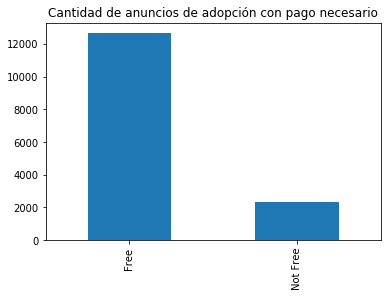

In [25]:
ax = fee_data['Free'].value_counts().plot.bar()
ax.set_title("Cantidad de anuncios de adopción con pago necesario")

In [26]:
def generate_fee_bins(fee):
    if fee == 0:
        return "0"
    elif fee < 25:
        return "[  1, 25)"
    elif fee < 60:
        return "[ 25, 59)"
    elif fee < 108:
        return "[ 59, 108)"
    elif fee < 210:
        return "[108, 210)"
    else:
        return "[210, 3000]"

In [27]:
fee_data['FeeBins'] = fee_data['Fee'].apply(generate_fee_bins)
fee_data

,Fee,AdoptionSpeed,PetID,Free,FeeBins
0,100,2,86e1089a3,Not Free,"[ 59, 108)"
1,0,3,3422e4906,Free,0
2,0,2,850a43f90,Free,0
3,0,2,d24c30b4b,Free,0
4,300,1,1caa6fcdb,Not Free,"[210, 3000]"
5,0,3,97aa9eeac,Free,0
6,0,1,c06d167ca,Free,0
7,0,4,7a0942d61,Free,0
8,50,1,8e76c8e39,Not Free,"[ 25, 59)"
9,0,2,aaedd873d,Free,0


In [28]:
fee_data['FeeBins'].value_counts().sort_index()

0              12663
[  1, 25)      346  
[ 25, 59)      610  
[ 59, 108)     514  
[108, 210)     437  
[210, 3000]    423  
Name: FeeBins, dtype: int64

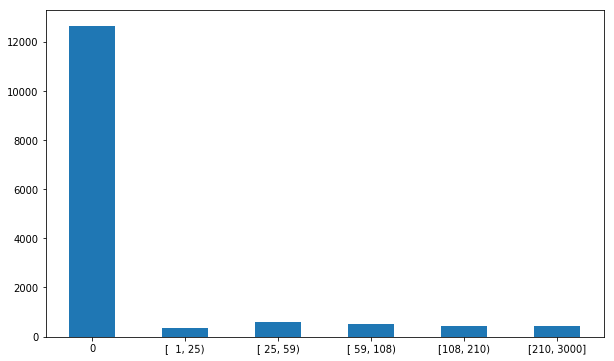

In [29]:
fee_data['FeeBins'].value_counts().sort_index().plot.bar(rot=0.25, figsize=(10,6))

In [30]:
feegroups = fee_data[['FeeBins','AdoptionSpeed', 'PetID']].groupby(['FeeBins','AdoptionSpeed']).count() 
feegroups = feegroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
feegroups = feegroups.pivot_table(index= 'FeeBins',columns='AdoptionSpeed',values='PetID')
feegroups

AdoptionSpeed,0,1,2,3,4
FeeBins,,,,,
0,357,2611,3430,2789,3476
"[ 1, 25)",5,68,104,74,95
"[ 25, 59)",13,140,158,117,182
"[ 59, 108)",11,88,114,101,200
"[108, 210)",11,91,112,90,133
"[210, 3000]",13,92,119,88,111


In [31]:
feepercentages = (feegroups.T / feegroups.sum(axis=1)).T
feepercentages

AdoptionSpeed,0,1,2,3,4
FeeBins,,,,,
0,0.028192,0.206191,0.270868,0.220248,0.274501
"[ 1, 25)",0.014451,0.196532,0.300578,0.213873,0.274566
"[ 25, 59)",0.021311,0.229508,0.259016,0.191803,0.298361
"[ 59, 108)",0.021401,0.171206,0.221790,0.196498,0.389105
"[108, 210)",0.025172,0.208238,0.256293,0.205950,0.304348
"[210, 3000]",0.030733,0.217494,0.281324,0.208038,0.262411


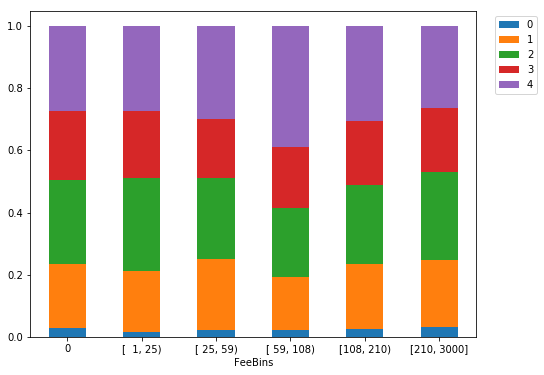

In [32]:
ax = feepercentages.plot.bar(stacked=True, figsize= (8,6), rot=0)
ax.legend(bbox_to_anchor = (1.03, 1.))

Se puede observar que la distribución se mantiene, a excepción de los anuncios con montos intermedios
<br><br>

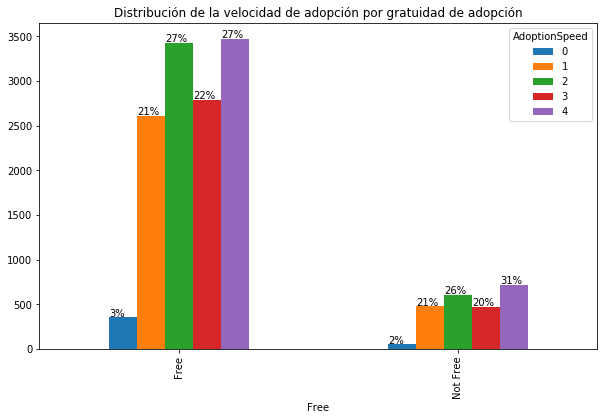

In [120]:
#deprecated
ax = feegroups.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por gratuidad de adopción")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(feepercentages.values.flat[ix]), (x, y + height + 10))

### State

In [40]:
state_counts = train.StateName.value_counts()
state_counts

Selangor           8714
Kuala Lumpur       3845
Pulau Pinang       843 
Johor              507 
Perak              420 
Negeri Sembilan    253 
Melaka             137 
Kedah              110 
Pahang             85  
Terengganu         26  
Sabah              22  
Kelantan           15  
Sarawak            13  
Labuan             3   
Name: StateName, dtype: int64

In [41]:
top7states = train.StateName.value_counts().index[:7]
top7states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Johor', 'Perak',
       'Negeri Sembilan', 'Melaka'],
      dtype='object')

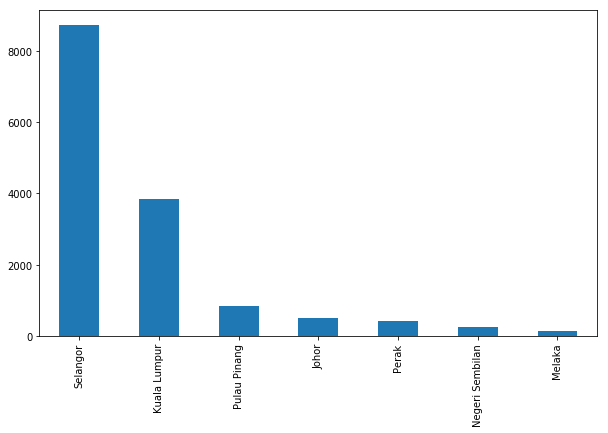

In [42]:
state_counts[:7].plot.bar(figsize=(10,6))

In [43]:
top5states = train.StateName.value_counts().index[:5]
top5states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Johor', 'Perak'], dtype='object')

In [ ]:
#no se ve muy bonito. Los menores a Perak los catalogaremos como otros

In [37]:
state_data = train[['StateName', 'AdoptionSpeed']].copy()

In [38]:
state_data['StateNameSimple'] = state_data['StateName'].apply(lambda state:\
                                                               state if state in top7states\
                                                                     else "Others")

In [39]:
state_data['AdoptionSpeedSimple'] = state_data.AdoptionSpeed.apply(lambda speed:\
                                                                  "Adopted" if speed < 4\
                                                                  else "Not Adopted")

In [17]:
top3states = train.StateName.value_counts().index[:3]
top3states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang'], dtype='object')

In [44]:
stgroups = train.loc[train.StateName.isin(top7states)]
stgroups = stgroups[['StateName','AdoptionSpeed', 'PetID']].groupby(['StateName','AdoptionSpeed']).count() 
stgroups = stgroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
stgroups = stgroups.pivot_table(index= 'StateName',columns='AdoptionSpeed',values='PetID')
stgroups = stgroups.reindex(top7states)
stgroups

AdoptionSpeed,0,1,2,3,4
Selangor,246,1877,2435,2004,2152
Kuala Lumpur,112,814,996,731,1192
Pulau Pinang,8,122,216,197,300
Johor,23,113,136,103,132
Perak,3,48,111,117,141
Negeri Sembilan,4,36,63,42,108
Melaka,4,18,23,12,80


In [45]:
stpercentages = (stgroups.T/stgroups.sum(axis=1)).T 
stpercentages

AdoptionSpeed,0,1,2,3,4
Selangor,0.028230,0.215401,0.279435,0.229975,0.246959
Kuala Lumpur,0.029129,0.211704,0.259038,0.190117,0.310013
Pulau Pinang,0.009490,0.144721,0.256228,0.233689,0.355872
Johor,0.045365,0.222880,0.268245,0.203156,0.260355
Perak,0.007143,0.114286,0.264286,0.278571,0.335714
Negeri Sembilan,0.015810,0.142292,0.249012,0.166008,0.426877
Melaka,0.029197,0.131387,0.167883,0.087591,0.583942


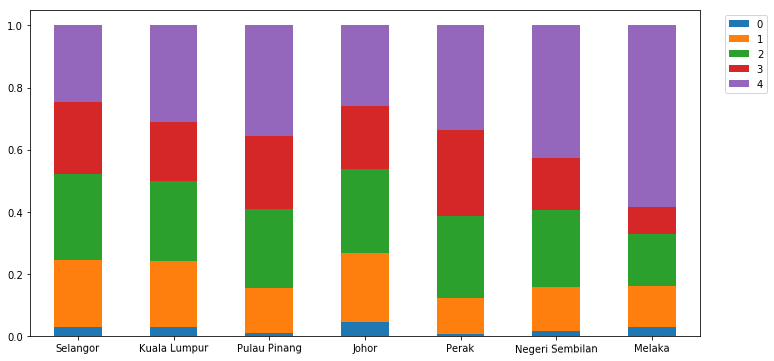

In [46]:
ax = stpercentages.plot.bar(stacked=True, figsize=(12,6), rot=0.5)
ax.legend(bbox_to_anchor = (1.03, 1.))

Existe una diferencia de velocidades de adopción en los distintos estados. Se puede observar que Selangor es el que tiene menor proporción de mascotas no adoptadas, y, junto a Johor, son las ciudades con adopciones más rápidas.

Esta variable podría adoptarse como posición geográfica, para que esté "a prueba de" creación de nuevos estados.

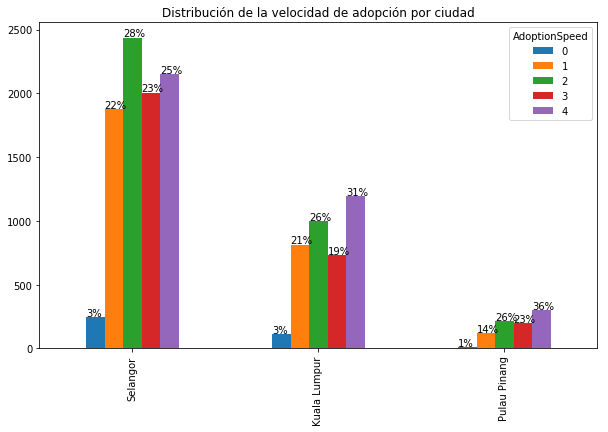

In [71]:
#deprecated
ax = stgroups.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por ciudad")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(stpercentages.values.flat[ix]), (x, y + height + 10))

In [90]:
stsimplegroups = state_data.loc[state_data.StateName.isin(top3states)]
stsimplegroups = stsimplegroups[['StateName','AdoptionSpeedSimple', 'StateNameSimple']].groupby(['StateName','AdoptionSpeedSimple']).count() 
stsimplegroups = stsimplegroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
stsimplegroups = stsimplegroups.pivot_table(index= 'StateName',columns='AdoptionSpeedSimple',values='StateNameSimple')
stsimplegroups = stsimplegroups.reindex(top3states)
stsimplegroups

AdoptionSpeedSimple,Adopted,Not Adopted
Selangor,6562,2152
Kuala Lumpur,2653,1192
Pulau Pinang,543,300


In [100]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [130]:
handles, labels = ax_selangor.get_legend_handles_labels()

([<matplotlib.patches.Wedge at 0x1ced2d30>,
 ['Adopted', 'Not Adopted'])

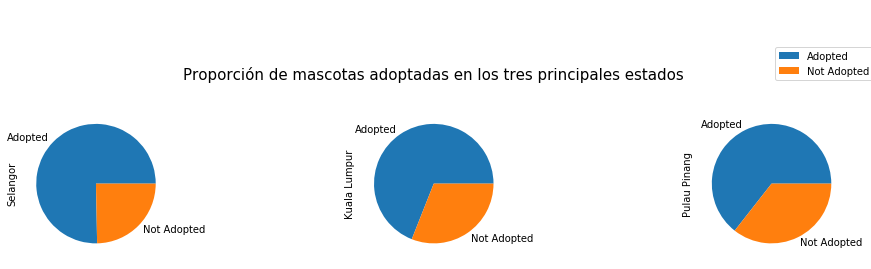

In [163]:
fig = plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
ax_selangor = stsimplegroups.T['Selangor'].plot.pie()

handles, labels = ax_selangor.get_legend_handles_labels()
fig.legend( handles, labels, loc = (0.89, 0.7))

plt.subplot(1,3,2)
plt.title("Proporción de mascotas adoptadas en los tres principales estados", {'fontsize': 15}, pad = 30)
ax_kuala_lumpur = stsimplegroups.T['Kuala Lumpur'].plot.pie()

plt.subplot(1,3,3)
ax_pulau = stsimplegroups.T['Pulau Pinang'].plot.pie()


plt.tight_layout()

En el segundo y tercer estado del ranking, se observa que la proporción de mascotas no adoptadas es mayor que en Selangor.

<br><br>
### Description

In [51]:
len({c for desc in train.Description.fillna('') for c in desc})

1571

In [52]:
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,StateName,QuantityGroup
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2,Selangor,Single pet
1,1,Brisco,1,307,0,1,2,7,0,2,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",3422e4906,7.0,3,Selangor,Single pet
2,1,Hunter,1,307,0,1,1,0,0,2,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",850a43f90,3.0,2,Selangor,Single pet
3,2,NaN,3,266,0,2,5,6,0,2,...,0,41326,22fe332bf9c924d4718005891c63fbed,0,"This is a stray kitten that came to my house. Have been feeding it, but cannot keep it.",d24c30b4b,2.0,2,Selangor,Single pet
4,2,BULAT,12,264,264,1,1,0,0,2,...,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who interested to adopt my cat can contact my father at this number (mazuvil)or can just email me. currently bulat is at my hometown at perak but anyone outside the area still want to adopt can travel there to my hometown.there is a lot of cats in my house rite now..i think i should let one of them go to a better owner who can give better attention to him.,1caa6fcdb,3.0,1,Selangor,Single pet
5,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies. Interested pls call or sms me. Left 2female puppies on 2/7/10,97aa9eeac,9.0,3,Selangor,> 3 pets
6,2,NaN,2,265,0,2,6,0,0,2,...,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in neighbours' garden. Not sure of sex.",c06d167ca,6.0,1,Selangor,Single pet
7,2,Kitty,12,265,0,2,1,7,0,2,...,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting.",7a0942d61,2.0,4,Selangor,Single pet
8,2,Kali,3,264,0,2,1,2,5,3,...,50,41326,a9caef3f98e67bfac9093cca79e20b93,0,"Kali is a super playful kitten who is on the go the minute she wakes up. She is very quiet and only meows very rarely. She likes to cuddle when she is sleepy and also when she wakes up from a nap. As long as she has her toys, she keeps herself active and busy during the day. Would recommend you spend at least half an hour every night to play with her as it is her normal routine now. Would recommend that you house her alone as a single cat or with another kitten. She has had her second vaccination and deworming and needs another one next month. Serious adopters only please. Looking for a good forever home for Kali. For more info/photos please whatsapp",8e76c8e39,2.0,1,Selangor,Single pet
9,1,Peanut,2,307,0,1,2,5,6,2,...,0,41326,db784cbcf321e1d8856b312638b94113,0,Peanut

In [53]:
train.loc[train.PetID == '000aa306a']

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,StateName,QuantityGroup


In [54]:
import os

In [59]:
import json

In [58]:
base_rel_path = 'data/train_sentiment'

In [75]:
text_metadata = []
for fname in os.listdir(base_rel_path):
    with open(base_rel_path+'/'+fname) as f:
        metadata = json.load(f)
        #relevant_data = {
        #   "PetID":fname.replace(".json",''),
        #    'language': metadata['language'],
        #    'documentSentiment': metadata['documentSentiment'],
        #    'sentences': metadata['sentences']
        #}
        del metadata['categories']
        del metadata['entities']
        del metadata['tokens']
        metadata['sentimentMagnitude'] = metadata['documentSentiment']['magnitude']
        metadata['sentimentScore'] = metadata['documentSentiment']['score']
        del metadata['documentSentiment']
        
        text_metadata.append(dict(metadata, **{"PetID":fname.replace(".json",'')}))#['labelAnnotations'
    

In [66]:
train.loc[train.PetID == '36ed4f417']

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,StateName,QuantityGroup
3332,2,Heather,8,266,0,2,2,0,0,2,...,0,41326,09771cded8c18d94a16a6548377410a8,0,"Heather is a lovely domestic shorthair tabby rescued from an apartment car park. Spayed, vaccinated and dewormed. She is very calm and affectionate and wishes to have a home where she can be safe and loved. Please contact Ee Lynn at or SMS if you are interested in adopting. Thank you!",36ed4f417,1.0,3,Selangor,Single pet


In [73]:
text_metadata

[{'PetID': '36ed4f417',
  'language': 'en',
  'sentences': [{'sentiment': {'magnitude': 0.7, 'score': 0.7},
    'text': {'beginOffset': -1,
     'content': 'Heather is a lovely domestic shorthair tabby rescued from an apartment car park.'}},
   {'sentiment': {'magnitude': 0, 'score': 0},
    'text': {'beginOffset': -1,
     'content': 'Spayed, vaccinated and dewormed.'}},
   {'sentiment': {'magnitude': 0.9, 'score': 0.9},
    'text': {'beginOffset': -1,
     'content': 'She is very calm and affectionate and wishes to have a home where she can be safe and loved.'}},
   {'sentiment': {'magnitude': 0.1, 'score': -0.1},
    'text': {'beginOffset': -1,
     'content': 'Please contact Ee Lynn at or SMS if you are interested in adopting.'}},
   {'sentiment': {'magnitude': 0.1, 'score': 0.1},
    'text': {'beginOffset': -1, 'content': 'Thank you!'}}],
  'sentimentMagnitude': 2,
  'sentimentScore': 0.3}]

In [77]:
train_metadata = pd.DataFrame(text_metadata)
train_metadata

,PetID,language,sentences,sentimentMagnitude,sentimentScore
0,36ed4f417,en,"[{'text': {'content': 'Heather is a lovely domestic shorthair tabby rescued from an apartment car park.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.7, 'score': 0.7}}, {'text': {'content': 'Spayed, vaccinated and dewormed.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}, {'text': {'content': 'She is very calm and affectionate and wishes to have a home where she can be safe and loved.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.9, 'score': 0.9}}, {'text': {'content': 'Please contact Ee Lynn at or SMS if you are interested in adopting.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': -0.1}}, {'text': {'content': 'Thank you!', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': 0.1}}]",2.0,0.3
1,502d58dea,en,"[{'text': {'content': 'Charcoal was adopted 2 years ago as my husband relative unable to take care of the puppy.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.4, 'score': -0.4}}, {'text': {'content': 'Charcoal been living with us at our Studio about 2 years plus and recently we force to move our studio to the Shoplot outside and there's no place for them to stay in the new studio.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': -0.3}}, {'text': {'content': 'We temporary move them to our house (, Jalan Asean 1/2, Taman Asean Melaka) But my father in law don't like animal, We attempt to persuade my father in law to accept them but he insist want us to abandon them. T_T', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': -0.3}}, {'text': {'content': 'We wish to find a new owner for him or temporary fosterer to take care for us.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': 0.3}}, {'text': {'content': 'We willing to pay reasonable price for dog food and we hope to keep in touch in Whatsapp or Wechat so that we can get Charcoal status update in future. :D', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.8, 'score': 0.8}}]",2.3,0.0
2,4133efff0,en,"[{'text': {'content': 'Lovely puppy looking for a forever home.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.9, 'score': 0.9}}, {'text': {'content': 'Commitment to spay is compulsory .', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': -0.1}}, {'text': {'content': 'If u are interested to adopt pls contact Rachel', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.2, 'score': 0.2}}]",1.2,0.3
3,8648922dd,en,"[{'text': {'content': 'Trixie and Baby are both females and are 6 weeks old', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}]",0.0,0.0
4,f376f922e,en,"[{'text': {'content': 'Dog for adoption', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': 0.1}}]",0.1,0.1
5,f95b39c6f,en,"[{'text': {'content': 'Dog 4 Adoption', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}]",0.0,0.0
6,4a2544358,en,"[{'text': {'content': 'Her name is MeiMei Healthy active girl Due to new working we unable to spend time with her so decide to up for adoption with some fees.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': -0.3}}, {'text': {'content': 'She loves to play with kids Know very simple command 'sit' If interested pls drop phone number or whatapps', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.9, 'score': 0.9}}]",1.2,0.2
7,a6b0179fb,en,"[{'text': {'content': 'Tia is 3 yrs old. she is a lovely cat, gentle and confident.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.9, 'score': 0.9}}, {'text': {'content': 'Mostly quiet.. good with dogs, cats n rabbits.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.8, 'score': 0.8}}]",1.8,0.9
8,dbf2d6b55,en,"[{'text': {'content': 'Adoption fee comes with clean-sand and a collar, just use to cover this expenses Looking for fast adoption, as my house cannot keep kitten.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': 0.1}}, {'text': {'content': 'Today is the best to adopt, come Sunway pyramid, I will be a

In [78]:
train_metadata.language.value_counts()

en         14309
zh         95   
zh-Hant    36   
de         2    
Name: language, dtype: int64

In [82]:
train_metadata.loc[train_metadata.language.isin([ 'de'])]

,PetID,language,sentences,sentimentMagnitude,sentimentScore
929,61f0927c3,de,"[{'text': {'content': 'Kiki Sgt manja dan aktiv.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.3, 'score': 0.3}}]",0.3,0.3
11917,6c34a5944,de,"[{'text': {'content': 'meowww...meow...meeeeoooOOOwww!', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.1, 'score': 0.1}}, {'text': {'content': 'repeat.', 'beginOffset': -1}, 'sentiment': {'magnitude': 0, 'score': 0}}, {'text': {'content': 'YES im talkative! =)', 'beginOffset': -1}, 'sentiment': {'magnitude': 0.6, 'score': 0.6}}]",0.9,0.3
